In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import keras
from keras.layers import Dense,Activation,Input
from keras.models import Model

In [5]:
ds = pd.read_csv("C:/Users/chira/Desktop/machine_learning/new_data/mnist/train.csv")
data = ds.values[:5000,1:]/255.0
print(data.shape)

(5000, 784)


In [14]:
#Defining the layers
inp = Input(shape=(784,))
h1 = Dense(100)
a1 = Activation('sigmoid')
y = Dense(784,)
ya = Activation('sigmoid')

#connecting the layers
out = ya(y(a1(h1(inp))))

#creating autoencoder model
model = Model(inputs=[inp],outputs = [out])
model.summary()
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

# creating encoder model
encoder = Model(inputs=[inp],outputs=[a1(h1(inp))])
encoder.summary()


# creating decoder model
dec_inp = Input(shape=(100,))
decoder = Model(inputs=[dec_inp],outputs = [ya(y(dec_inp))])
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_11 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 784)               79184     
_________________________________________________________________
activation_12 (Activation)   (None, 784)               0         
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inpu

In [15]:
hist = model.fit(data[:4500],data[:4500],
                epochs=100,
                shuffle = True,
                batch_size=100,
                 validation_data=(data[4500:],data[4500:]))

Train on 4500 samples, validate on 500 samples
Epoch 1/100
4500/4500 [==============================] - 1s 116us/step - loss: 0.1125 - acc: 0.0084 - val_loss: 0.0691 - val_acc: 0.0040
Epoch 2/100
4500/4500 [==============================] - 0s 63us/step - loss: 0.0691 - acc: 0.0120 - val_loss: 0.0673 - val_acc: 0.0160
Epoch 3/100
4500/4500 [==============================] - 0s 58us/step - loss: 0.0676 - acc: 0.0136 - val_loss: 0.0656 - val_acc: 0.0040
Epoch 4/100
4500/4500 [==============================] - 0s 61us/step - loss: 0.0655 - acc: 0.0133 - val_loss: 0.0633 - val_acc: 0.0040
Epoch 5/100
4500/4500 [==============================] - 0s 60us/step - loss: 0.0629 - acc: 0.0133 - val_loss: 0.0608 - val_acc: 0.0040
Epoch 6/100
4500/4500 [==============================] - 0s 62us/step - loss: 0.0603 - acc: 0.0156 - val_loss: 0.0583 - val_acc: 0.0080
Epoch 7/100
4500/4500 [==============================] - 0s 61us/step - loss: 0.0577 - acc: 0.0167 - val_loss: 0.0558 - val_acc: 0.0120


4500/4500 [==============================] - 0s 59us/step - loss: 0.0143 - acc: 0.0100 - val_loss: 0.0155 - val_acc: 0.0080
Epoch 61/100
4500/4500 [==============================] - 0s 66us/step - loss: 0.0141 - acc: 0.0102 - val_loss: 0.0153 - val_acc: 0.0100
Epoch 62/100
4500/4500 [==============================] - 0s 60us/step - loss: 0.0139 - acc: 0.0100 - val_loss: 0.0150 - val_acc: 0.0080
Epoch 63/100
4500/4500 [==============================] - 0s 59us/step - loss: 0.0137 - acc: 0.0102 - val_loss: 0.0148 - val_acc: 0.0080
Epoch 64/100
4500/4500 [==============================] - 0s 63us/step - loss: 0.0135 - acc: 0.0109 - val_loss: 0.0147 - val_acc: 0.0100
Epoch 65/100
4500/4500 [==============================] - 0s 62us/step - loss: 0.0133 - acc: 0.0109 - val_loss: 0.0145 - val_acc: 0.0100
Epoch 66/100
4500/4500 [==============================] - 0s 63us/step - loss: 0.0131 - acc: 0.0104 - val_loss: 0.0143 - val_acc: 0.0040
Epoch 67/100
4500/4500 [==============================

In [16]:
ex = encoder.predict(data[:100])
print (ex.shape)

(100, 100)


In [19]:
dx = decoder.predict(ex)
print(dx.shape)

(100, 784)


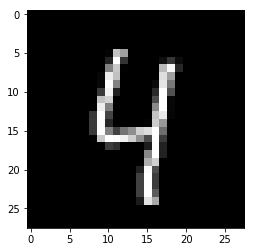

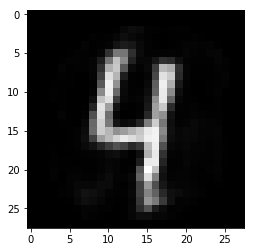

In [27]:
n =np.random.choice(range(100))
plt.figure(0)
plt.imshow(data[n].reshape(28,28),cmap='gray')

plt.figure(1)
plt.imshow(dx[n].reshape(28,28),cmap='gray')